In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import h5py

%matplotlib inline

/Users/virgileaudi/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
train_perp = [1038.2,601.86,527.43,478.24,441.1,411.9,388.22,368.57,351.92,337.53,324.88,313.59,303.42,294.15,285.66,289.63,287.61,286.44,285.45,284.5,274.63,267.31,260,254.65,248.9,243.5,238.5]
valid_txt_perp = [639.06,544.09,490.41,451.28,421.14,397.32,377.9,361.76,348.08,336.26,325.90,316.70,308.46,301.02,294.251,298.53,298.16,297.6, 297,296.4,285.712,279,274,270.11,265.7,261.6,257.8]
kagg_perp = [8.00,7.54,7.31,7.13,6.97,6.84,6.72,6.62,6.53,6.45,6.38,6.31,6.25,6.19,6.14,6.16,6.15,6.15,6.15,6.14,6.07,6.02,5.98,5.94,5.9,5.86,5.8]

In [7]:
sns.set_style("darkgrid")

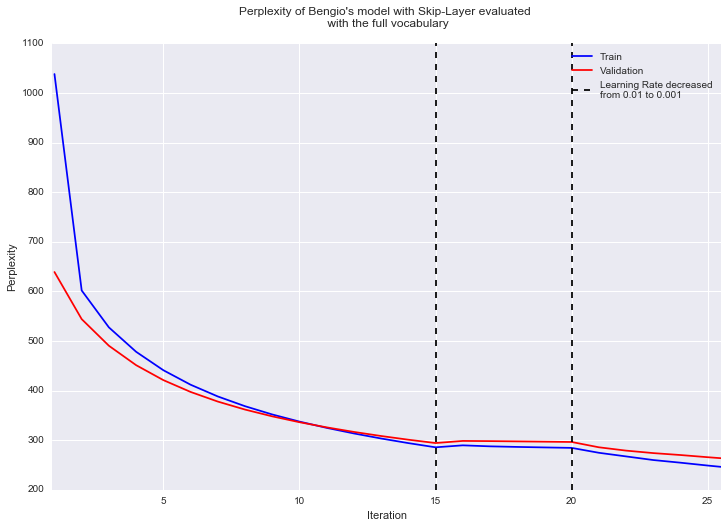

In [23]:
plt.figure(figsize=(12,8))
plt.plot(range(1,28),train_perp,color = 'blue', label = 'Train')
plt.plot(range(1,28),valid_txt_perp, color = 'red', label = 'Validation')
plt.axvline(15, color='k', linestyle='--',label='Learning Rate decreased\nfrom 0.01 to 0.001')
plt.axvline(20, color='k', linestyle='--')
plt.xlim(0.9,25.5)
plt.xlabel('Iteration')
plt.ylabel('Perplexity')
plt.title("Perplexity of Bengio's model with Skip-Layer evaluated \n with the full vocabulary\n")
plt.legend(loc = 1)
plt.show()

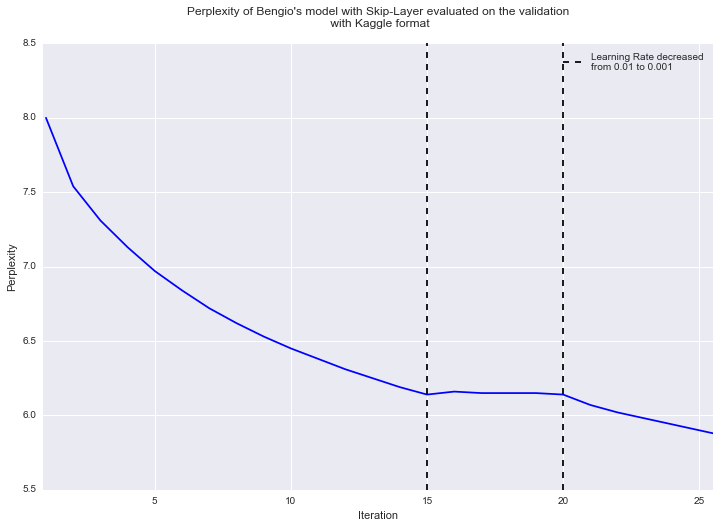

In [26]:
plt.figure(figsize=(12,8))
plt.plot(range(1,28),kagg_perp,color = 'blue')
plt.axvline(15, color='k', linestyle='--',label='Learning Rate decreased\nfrom 0.01 to 0.001')
plt.axvline(20, color='k', linestyle='--')
plt.xlim(0.9,25.5)
plt.ylim(5.5,8.5)
plt.xlabel('Iteration')
plt.ylabel('Perplexity')
plt.title("Perplexity of Bengio's model with Skip-Layer evaluated on the validation\n with Kaggle format\n")
plt.legend(loc = 1)
plt.show()

In [14]:
with h5py.File('bengio_2_perp.f5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    perptxt = hf.get('test')
    perpval = hf.get('valid')
    perptxt = np.array(perptxt)
    perpval = np.array(perpval)

('List of arrays in this file: \n', [u'test', u'valid'])


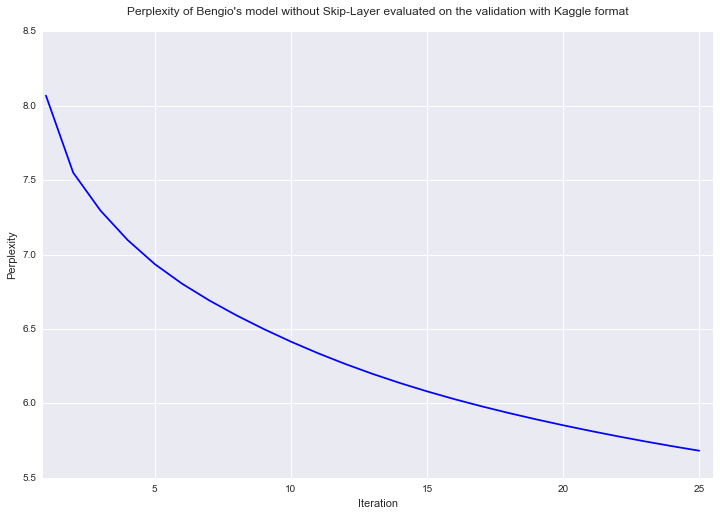

In [32]:
plt.figure(figsize=(12,8))
plt.plot(range(1,26),perpval,color = 'blue')
plt.xlim(0.9,25.5)
plt.xlabel('Iteration')
plt.ylabel('Perplexity')
plt.title("Perplexity of Bengio's model without Skip-Layer evaluated on the validation with Kaggle format\n")
plt.show()

In [30]:
tr = [1082,625,542,488,450,420,396,377,360,346,334,322,312,303,294,286,279,272,266,260,254,249,244,239,235]
print len(tr)

25


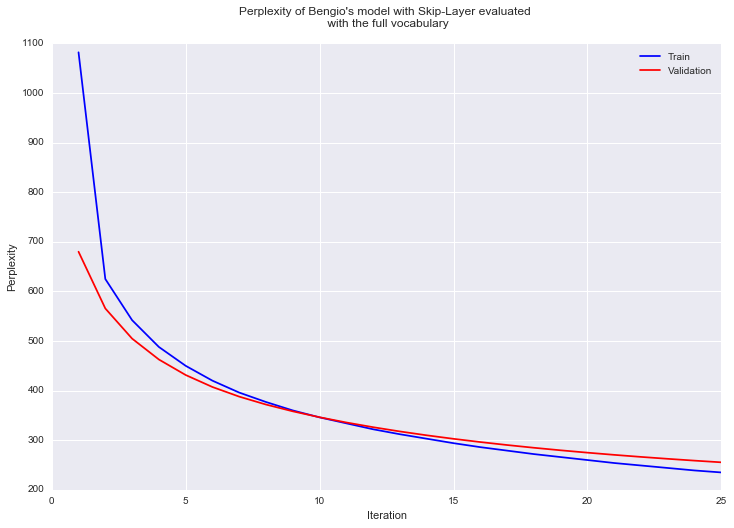

In [33]:
plt.figure(figsize=(12,8))
plt.plot(range(1,26),tr,color = 'blue', label = 'Train')
plt.plot(range(1,26),perptxt, color = 'red', label = 'Validation')
plt.xlabel('Iteration')
plt.ylabel('Perplexity')
plt.title("Perplexity of Bengio's model with Skip-Layer evaluated \n with the full vocabulary\n")
plt.legend(loc = 1)
plt.show()

In [13]:
perpval

array(None, dtype=object)